# Esame di Metodi Numerici del 7 Maggio 2025

## Ore 14

## Esercizio 1


 Nel file ````test_7_maggio_2025.mat```` sono memorizzati  le matrici di due sistemi lineari:
 
    A  x = b 

    A1 x1 = b1
 
 dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.

 - Verificare che per risolvere ciascuno dei due sistemi sia possibile utilizzare i due metodi di discesa (visti a lezione) ed il metodo di Gauss-Seidel, richiamando i risultati teorici opportuni.
 **Punti 1**
 - implementare i tre  algoritmi e  dire quante iterazioni richiede ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 7**
 - Analizzare l'indice di condizionamento delle due matrici e richiamare teoricamente cosa questo implica in termini della velocità di convergenza  dei tre metodi alla soluzione, richiamando i risultati teorici visti a lezione.**Punti 3**


**Punti totali 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_7_maggio_2025')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


In [1]:
from scipy.io import loadmat
import numpy as np
from SolveTriangular import Lsolve, Usolve
import matplotlib.pyplot as plt

dati = loadmat('test_7_maggio_2025')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

In [2]:
# punto 1
# mostriamo le caratteristiche della matrice
def mostra_caratteristiche(nome, A):
    print("Matrice:", nome)
    print("- dimensione:", A.shape)
    quadrata=A.shape[0]==A.shape[1]
    print("- quadrata:", quadrata)
    print("- condizionamento:", np.linalg.cond(A))
    if quadrata:
        print("- densità:", np.count_nonzero(A)/np.prod(A.shape))
        print("- simmetrica:", np.all(A.T==A))
        print("- definita positiva:", np.all(np.linalg.eigvals(A)>0))
        print("- diagonale strettamente dominante:", np.all(2*np.diag(np.abs(A))>np.sum(np.abs(A), axis=1))) # |Aii| > sum_j!=i|Aij| => 2|Aii| > sum_j|Aij|
    else:
        print("- rango massimo:", np.linalg.matrix_rank(A)==np.min(A.shape))
    print()
    
mostra_caratteristiche("A", A)
mostra_caratteristiche("A1", A1)
# Entrambe le matrici sono simmetriche e definite positive, quindi sono applicabili sia i metodi di discesa (steepest descent e gradiente coniugato) che Gauss-Seidel (normale e SOR).
# Inoltre, essendo quadrate, grandi e sparse, sono molto consigliati questi metodi.

Matrice: A
- dimensione: (500, 500)
- quadrata: True
- condizionamento: 500.00000000001234
- densità: 0.076368
- simmetrica: True
- definita positiva: True
- diagonale strettamente dominante: False

Matrice: A1
- dimensione: (800, 800)
- quadrata: True
- condizionamento: 10.00000000000026
- densità: 0.076596875
- simmetrica: True
- definita positiva: True
- diagonale strettamente dominante: False



Matrice: A
Iterazioni:
- Steepest descent: 1715
- Gradiente coniugato: 117
- Gauss-Seidel: 319


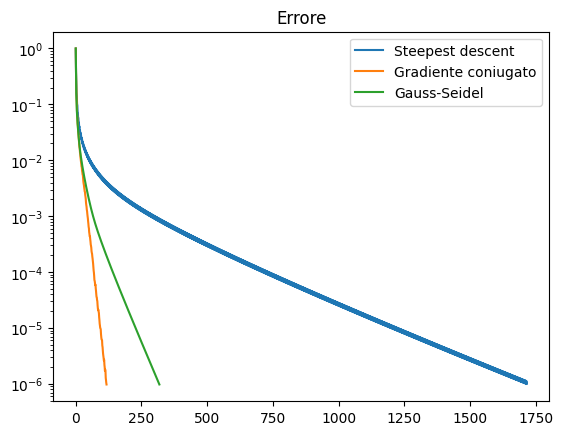


Matrice: A1
Iterazioni:
- Steepest descent: 55
- Gradiente coniugato: 21
- Gauss-Seidel: 21


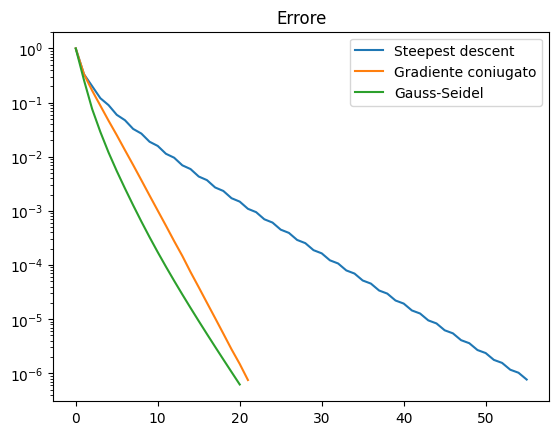

In [3]:
# punto 2
def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
    # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b 
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x.copy())
    vet_r=[]
    vet_r.append(errore)
     
    # utilizzare il metodo del gradiente per trovare la soluzione
    while it < itmax and errore > tol:
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x + alpha*p
        
         
        vec_sol.append(x.copy())
        r=r + alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r # direzione opposta al gradiente per massima decrescita
        
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
    # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while it < itmax and errore > tol:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap) 
        x = x + alpha*p
        vec_sol.append(x.copy())
        rtr_old=r.T@r
        r= r + alpha*Ap 
        gamma=r.T@r/rtr_old 
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r +gamma*p # discesa lungo il gradiente coniugato sul piano formato da -r e p
    
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

def gauss_seidel(A,b,x0,itmax,tol):
    errore=1000
    d=np.diag(A)
    D=np.diag(d) 
    E=np.tril(A,-1) 
    F=np.triu(A,1) 
    M=D+E 
    N=-F 
    invM=np.linalg.inv(M)
    # T=invM@N 
    # autovalori=np.linalg.eigvals(T)
    # raggiospettrale=np.max(np.abs(autovalori))
    # print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it < itmax and errore > tol:
        x,_=Lsolve(M, b+N@x0) 
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x) 
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

toll=1e-6
maxit=2000
for (nome, Ai, bi) in [("A", A, b), ("A1", A1, b1)]:
    x0 = np.zeros_like(bi)
    x_sd, err_sd, _, it_sd = steepestdescent(Ai, bi, x0, maxit, toll)
    x_cg, err_cg, _, it_cg = conjugate_gradient(Ai, bi, x0, maxit, toll)
    x_gs, it_gs, err_gs = gauss_seidel(Ai, bi, x0, maxit, toll)
    print("Matrice:", nome)
    print("Iterazioni:")
    print("- Steepest descent:", it_sd)
    print("- Gradiente coniugato:", it_cg)
    print("- Gauss-Seidel:", it_gs)
    plt.title("Errore")
    plt.yscale("log")
    plt.plot(range(it_sd+1), err_sd, label="Steepest descent")
    plt.plot(range(it_cg+1), err_cg, label="Gradiente coniugato")
    plt.plot(range(it_gs), err_gs, label="Gauss-Seidel")
    plt.legend()
    plt.show()
    print()

In [4]:
# punto 3
# mostriamo di nuovo il condizionamento delle due matrici calcolato anche in precedenza
print("Indice di condizionamento:")
print("- A:", np.linalg.cond(A)) # K(A) = 500
print("- A1:", np.linalg.cond(A1)) # K(A1) = 10

# Il metodo del gradiente (steepest descent) è sempre il più lento a convergere ad una soluzione, a causa del suo movimento a "zig-zag" dovuto al fatto che il gradiente di ogni curva di livello è
# perperndicolare al precedente.
# Tra Gauss-Seidel e il metodo del gradiente coniugato, invece, dipende se la matrice ha un buon o un cattivo indice di condizionamento: possiamo infatti notare che nella matrice A, con K(A) elevato,
# Gauss-Seidel soffre molto del cattivo condizionamento della matrice che porta ad un aumento elevato accumolo dell'errore durante le varie iterazioni, mentre quando con la matrice A1, che ha un K(A1)
# molto piccolo, riesce a battere il metodo del gradiente coniugato.

Indice di condizionamento:
- A: 500.00000000001234
- A1: 10.00000000000026


## Esercizio  2

**Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,3$ con**
$$
\begin{array}{c}
x_1=1, \quad x_2=4, \quad x_3=0, \\
y_1=1, \quad y_2=0, \quad y_3=4 .
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisce il sistema lineare  ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i tre punti assegnati, e si denotino con ${\bf M}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 3**]

- si calcola la soluzione del sistema lineare ${\bf M}{\bf a}={\bf b}$ usando il metodo di fattorizzazione adatto alle caratteristiche della matrice $M$[**punti 2**]

- dopo averne determinato centro e raggio (vedi sotto formula), si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ (dove i coefficienti $a_i$ rappresentano la soluzione del sistema lineare del punto precedente) e i tre punti assegnati dal problema.[**punti 1**]
- Abbiamo costruito la circonferenza  passante i punti del piano
  [**punti 1**] 
  (completare al posto dei puntini)


In [5]:
import numpy as np
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt

In [10]:
# punto 1
# Sostituisco x e y ogni volta con uno dei 3 punti
M = np.array([
    [1, 1, 1],
    [4, 0, 1],
    [0, 4, 1],
])
b = np.array([-2, -16, -16]).reshape((-1, 1))

In [7]:
# punto 2
mostra_caratteristiche("M", M) # quadrata, piccola, densa, ben condizionata, non simmetrica e non definita positiva: utilizzo la fattorizzazione LU di Gauss

def gauss_lu(A, b):
    PT, L, U = sp.linalg.lu(A)
    P=PT.T.copy()

    x, flag = Lsolve(L, P@b)
    if flag == 0:
        return Usolve(U, x)[0]
    return None

a = gauss_lu(M, b)
print("Soluzione Ma = b:", a)

Matrice: M
- dimensione: (3, 3)
- quadrata: True
- condizionamento: 10.403882032022088
- densità: 0.7777777777777778
- simmetrica: False
- definita positiva: False
- diagonale strettamente dominante: False

Soluzione Ma = b: [[-7.]
 [-7.]
 [12.]]


Centro circonferenza: (np.float64(3.5), np.float64(3.5))
Raggio circonferenza: 3.5355339059327378


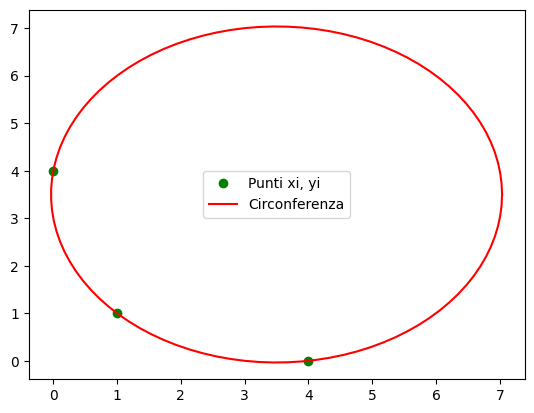

In [8]:
# punto 3
a1, a2, a3 = a.flatten()
Cx = -a1/2
Cy = -a2/2
r = np.sqrt((a1**2)/4 + (a2**2)/4 - a3)
print("Centro circonferenza:", (Cx, Cy))
print("Raggio circonferenza:", r)

fx = lambda t: Cx + r*np.cos(t)
fy = lambda t: Cy + r*np.sin(t)

t = np.linspace(0, 2*np.pi, 100)
xi = np.array([1, 4, 0])
yi = np.array([1, 0, 4])
plt.plot(xi, yi, "go", label="Punti xi, yi")
plt.plot(fx(t), fy(t), "r-", label="Circonferenza")
plt.legend()
plt.show()

**Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con**
$$
\begin{array}{c}
x_1=1, \quad x_2=4, \quad x_3=0, \quad x_4=5 \\
y_1=1, \quad y_2=0, \quad y_3=4  \quad y_4=6.
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisce il sistema lineare sovradeterminanto ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf c}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 1**]

- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf c}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf c}\|_2^2$;   [**punti 5**]

-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 1**]
-  
**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$


**Punti totali 14**

In [16]:
# punto 1
# Sostituisco x e y ogni volta con uno dei 4 punti
A = np.array([
    [1, 1, 1],
    [4, 0, 1],
    [0, 4, 1],
    [5, 6, 1],
])
c = np.array([-2, -16, -16, -61]).reshape((-1, 1))

In [18]:
# punto 2
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    Q,R=sp.linalg.qr(A)
    h=Q.T@b 
    x,_ = Usolve(R[:n,:], h[:n])
    residuo=np.linalg.norm(h[n:])**2 
    return x,residuo

astar, residuo_as = qrLS(A, c)
# il secondo valore richiesto corrisponde al residuo
print("Soluzione a*:", astar)
print("Residuo a*:", residuo_as)

Soluzione a*: [[-6.51401869]
 [-6.50333778]
 [10.41922563]]
Residuo a*: 0.68357810413887


Centro circonferenza: (np.float64(3.2570093457943914), np.float64(3.2516688918558088))
Raggio circonferenza: 3.280584525153388


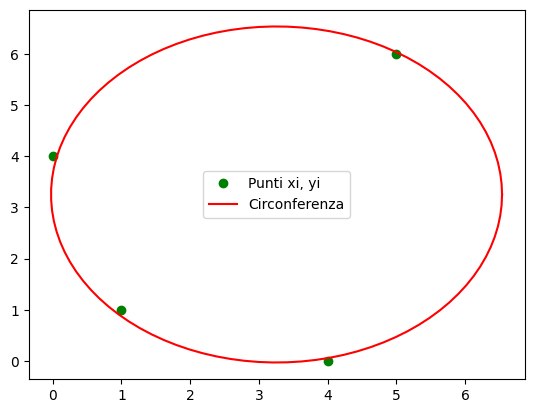

In [19]:
# punto 3
a1s, a2s, a3s = astar.flatten()
Cxs = -a1s/2
Cys = -a2s/2
rs = np.sqrt((a1s**2)/4 + (a2s**2)/4 - a3s)
print("Centro circonferenza:", (Cxs, Cys))
print("Raggio circonferenza:", rs)

fxs = lambda t: Cxs + rs*np.cos(t)
fys = lambda t: Cys + rs*np.sin(t)

t = np.linspace(0, 2*np.pi, 100)
xis = np.array([1, 4, 0, 5])
yis = np.array([1, 0, 4, 6])
plt.plot(xis, yis, "go", label="Punti xi, yi")
plt.plot(fxs(t), fys(t), "r-", label="Circonferenza")
plt.legend()
plt.show()

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

**1** 
Quale delle seguenti affermazioni è FALSA riguardo alle reti MLP (Multilayer Perceptron)?

- Le reti MLP sono composte da uno o più strati nascosti di neuroni.
- Le reti MLP utilizzano una funzione di attivazione non lineare per introdurre una non linearità nel modello.

- Le reti MLP sono in grado di apprendere solo relazioni lineari tra i dati di input e output.

- Le reti MLP possono essere utilizzate per risolvere una vasta gamma di problemi di apprendimento automatico, tra cui la classificazione e la regressione.


**2.**  Quale delle seguenti affermazioni è la definizione CORRETTA di learning rate nel training di una rete neurale?

A) Il numero di volte in cui l'intero set di dati viene utilizzato durante il training.

B) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

C) Il numero di neuroni presenti nello strato di output della rete.

D) La funzione di attivazione utilizzata dai neuroni della rete


3- Quale delle seguenti affermazioni è vera riguardo ai layer convoluzionali in una rete CNN?

(a) I layer convoluzionali applicano una funzione di attivazione a ciascun elemento della feature map in ingresso.

(b) I layer convoluzionali eseguono una convoluzione tra i filtri convoluzionali e la feature map in ingresso, producendo una nuova feature map.

(c) I layer convoluzionali riducono la dimensione spaziale della feature map in ingresso.

(d) I layer convoluzionali aumentano la dimensione spaziale della feature map in ingresso.

**4.**  
Quale tra le seguenti affermazioni descrive   il compito della funzione di attivazione nel training di una rete neurale?

- Trasformare i dati di input in un formato compatibile con la rete neurale

- Introdurre una non linearità nel flusso di informazioni della rete

- Calcolare l'errore tra l'output previsto e quello effettivo

- Aggiornare i pesi delle connessioni tra i neuroni softmax


**5.** Quale tra le seguenti affermazioni è FALSA riguardo alla suddivisione del dataset in un contesto di machine learning?

- La suddivisione del dataset in set di training, validation e test è fondamentale per valutare correttamente le prestazioni di un modello di machine learning.
- Il set di training viene utilizzato per addestrare il modello sui dati.
- Il set di validation viene utilizzato per trovare le etichette dei dati di input
- Il set di test viene utilizzato per valutare le prestazioni finali del modello su dati che non sono stati utilizzati per il training o la validation

# Domande aperte

**6. Descrivi in cosa consiste la fase di forward-propagation e back-propagation nell'ambito del training di una rete neurale, soffermandoti sull'importanza dell'algoritmo di backpropagation** per il calcolo delle derivate parziali della funzione costo rispetto ai pesi di tutti i layer **[punti 1.5]**

**7** Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 3]**